In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import helper
%matplotlib inline
import pandas as pd

# 그림 데이터 불러오기
train_x_raw, train_y_raw, test_x_raw, test_y_raw = helper.loaddata()
train_x, test_x, train_y, test_y = helper.flatten(train_x_raw, train_y_raw, test_x_raw, test_y_raw)

<h1>Data Introduction & Manipulation</h1>

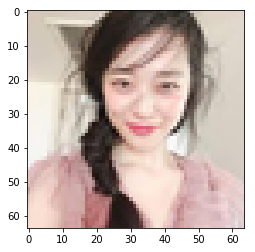

In [3]:
# Data introduction
plt.imshow(helper.image_arr(4, train_x_raw))

<html>
    <img src="images/week1_01.png" />
</html>

In [4]:
# Matrix 의 구조를 확인하는 방법
print(train_x_raw.shape)
print(train_x.shape)

(207, 64, 64, 3)
(12288, 207)


In [5]:
# Matrix 의 실제 값을 확인하는 방법
dataview = pd.DataFrame(train_x)
dataview.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,1.0,1.0,1.0,0.878431,0.827451,1.0,0.258824,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.054902,1.0,1.0
1,1.0,1.0,1.0,0.850980,0.772549,1.0,0.223529,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.070588,1.0,1.0
2,1.0,1.0,1.0,0.780392,0.721569,1.0,0.188235,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.176471,1.0,1.0
3,1.0,1.0,1.0,0.854902,0.835294,1.0,0.266667,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.054902,1.0,1.0
4,1.0,1.0,1.0,0.827451,0.780392,1.0,0.231373,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.070588,1.0,1.0


<h1>Neural model architecture</h1>

<h3>Neural model architecture > Define Layer info</h3>

<html>
    <img src="images/week1_02.png" />
</html>

<html>
    <h3>Neural model architecture > Input Layer</h3>
    <img src="images/week1_03.png" />
</html>

In [6]:
# Input layer 로 들어갈 이미지의 값을 알아봅시다.
X = train_x.T[4,]
print(X)

[ 0.82745098  0.77254902  0.72156863 ...,  0.88627451  0.81568627
  0.82352941]


<html>
    <h3>Neural model architecture > Weight Matrix (1)</h3>
    <img src="images/week1_04.png" />
    <h5>X의 각각의 값과 w의 각각의 값을 곱하여 더하면, 입력된 그림이 사람일 가능성이 계산됩니다.</h5>
</html>

<html>
    <h3>Neural model architecture > Weight Matrix (2)</h3>
    <img src="images/week1_05.png" />
</html>

In [7]:
# 실제 행렬의 곱셈과 비교해봅시다.

In [8]:
matrixA = pd.DataFrame([[1, 2]])
matrixA

,0,1
0,1,2


In [9]:
matrixB = pd.DataFrame([2, 1])
matrixB

,0
0,2
1,1


In [10]:
# 행렬의 곱셈
matrixmult = np.dot(matrixA, matrixB)

In [11]:
# 행렬의 곱셈의 결과
matrixmult = pd.DataFrame(matrixmult)
matrixmult

,0
0,4


<html>
    <h3>Neural model architecture > Input as Multiple Images</h3>
    <img src="images/week1_06.png" />
</html>

<html>
    <h3>Neural model architecture > Define Architecture</h3>
    <img src="images/week1_07.png" />
</html>

<h1>Forward</h1>
<h3>컴퓨터야 한번 사람얼굴을 찾아볼래?</h3>

<html>
    <h3>Forward > linear function</h3>
</html>

In [12]:
# 랜덤하게 w 행렬을 생성합니다.
w, b = helper.initialize_a_layer(12288, 1)
# Linear function. 사진이 사람일 확률을 예측 1단계
z = helper.liner_function(w, train_x, b)
z_panda = pd.DataFrame(z)
z_panda

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,0.852984,1.000681,1.077836,0.405464,0.689318,1.227004,0.452333,1.27612,1.007251,1.349731,...,1.231806,1.050286,1.469955,1.35657,0.328251,0.87794,0.91473,0.733012,1.154889,0.606088


<html>
    <img src="images/week1_08.png" />
</html>

<html>
    <h3>Forward > Activation function</h3>
</html>

<html>
    <img src="images/week1_09.png" />
</html>

In [13]:
# Activation function. 사진이 사람일 확률을 예측 2단계
A = helper.activation_function(z)
A_panda = pd.DataFrame(A)
A_panda

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,0.701193,0.731192,0.746084,0.6,0.665815,0.773294,0.611194,0.781789,0.732482,0.794086,...,0.774135,0.74083,0.813051,0.795202,0.581334,0.706395,0.713967,0.675466,0.760403,0.647048


<html>
    <h1>Cost function</h1>
    <h3>얼마나 잘 맞췄을까요</h3>
</html>

('Wrong classified: ', 119)
[  9  11  12  13  15  16  17  18  19  21  23  24  25  28  31  34  36  37
  39  43  44  47  49  50  51  52  53  54  56  57  58  61  62  64  66  67
  68  69  72  73  74  76  78  81  83  84  86  87  88  89  91  92  93  96
  97 100 101 103 104 108 109 111 112 113 115 117 118 119 120 121 125 126
 129 130 131 132 133 135 136 138 139 140 142 144 145 148 151 153 155 158
 161 164 165 168 170 171 172 173 178 179 180 181 182 185 186 187 188 190
 191 192 193 194 195 196 197 198 199 200 205]


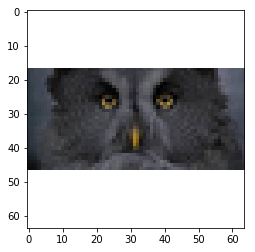

In [14]:
wrongImages = helper.getWrongImages(A, train_y)
print("Wrong classified: ", len(wrongImages))
print(wrongImages)
plt.imshow(helper.image_arr(9, train_x_raw))

In [15]:
cost = helper.calculate_cost(train_y, A)
print(cost)

[ 0.95794612]


<h3>잘 맞추게 하려면?</h3>
잘 맞추게 하려면 어떻게 해야 할까요? → w와 b값들을 조정

<html>
    <h1>Back propagation</h1>
</html>

<html>
    <h3>Back propagation > Gradient Discent</h3>
</html>

<html>
    <img src="images/week1_10.png" />
</html>

In [16]:
grads = helper.gradients(train_x, A, train_y)

<html>
    <h3>Back propagation > Update</h3>
    <h5>w와 b값들을 조정</h5>
</html>

In [17]:
learning_rate = 0.05

In [18]:
print("w 값들을 learning rate(0.05) 만큼 조정")
w = w - learning_rate * grads["dw"]

w 값들을 learning rate(0.05) 만큼 조정


In [19]:
print("b 값들을 learning rate(0.05) 만큼 조정")
b = b - learning_rate * grads["db"]

b 값들을 learning rate(0.05) 만큼 조정


<h1>Forward again</h1>
<h3>컴퓨터야. 배운 w로 다시 예측해볼래? </h3>
<h5>과연 이번에는 어느정도 맞출수 있을까요?<h5>

In [20]:
z = helper.liner_function(w, train_x, b) # linear function
A = helper.activation_function(z) # activation function
wrongImages = helper.getWrongImages(A, train_y)
print("Wrong classified: ", len(wrongImages))
print(wrongImages)

('Wrong classified: ', 88)
[  0   1   2   3   4   5   6   7   8  10  14  20  22  26  27  29  30  32
  33  35  38  40  41  42  45  46  48  55  59  60  63  65  70  71  75  77
  79  80  82  85  90  94  95  98  99 102 105 106 107 110 114 116 122 123
 124 127 128 134 137 141 143 146 147 149 150 152 154 156 157 159 160 162
 163 166 167 169 174 175 176 177 183 184 189 201 202 203 204 206]


<h1>Train model</h1>
<h3>그럼, 반복해서 Forward, Backward 를 수행하면 결과가 더 좋아질까요?</h3>

(0, 'th iteration cost: ', array([ 0.95794612]))
(100, 'th iteration cost: ', array([ 0.81919395]))
(200, 'th iteration cost: ', array([ 0.64112996]))
(300, 'th iteration cost: ', array([ 0.52585625]))
(400, 'th iteration cost: ', array([ 0.41457314]))
(500, 'th iteration cost: ', array([ 0.31504912]))
(600, 'th iteration cost: ', array([ 0.21005156]))
(700, 'th iteration cost: ', array([ 0.12325553]))
(800, 'th iteration cost: ', array([ 0.10965706]))
(900, 'th iteration cost: ', array([ 0.10152203]))
('training set accuracy: ', 0.9903381642512077)
('test set accuracy: ', 0.7083333333333333)


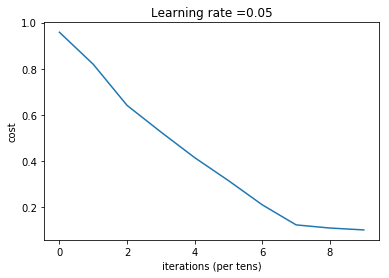

In [21]:
result = helper.train_model_(train_x, train_y, test_x, test_y, 1000, 0.005)
# result = train_model_(w, b, train_x, train_y, 1000, 0.05) # gradient Explode
costs = result["costs"]
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

<h1>Evaluation</h1>
<h3>잘못 분류된 결과들은 무엇이 있을까요</h3>

('Misclassified Images:', '[ 0  1 10 11 15 21 25 31 36 37 38 40 44 47]')


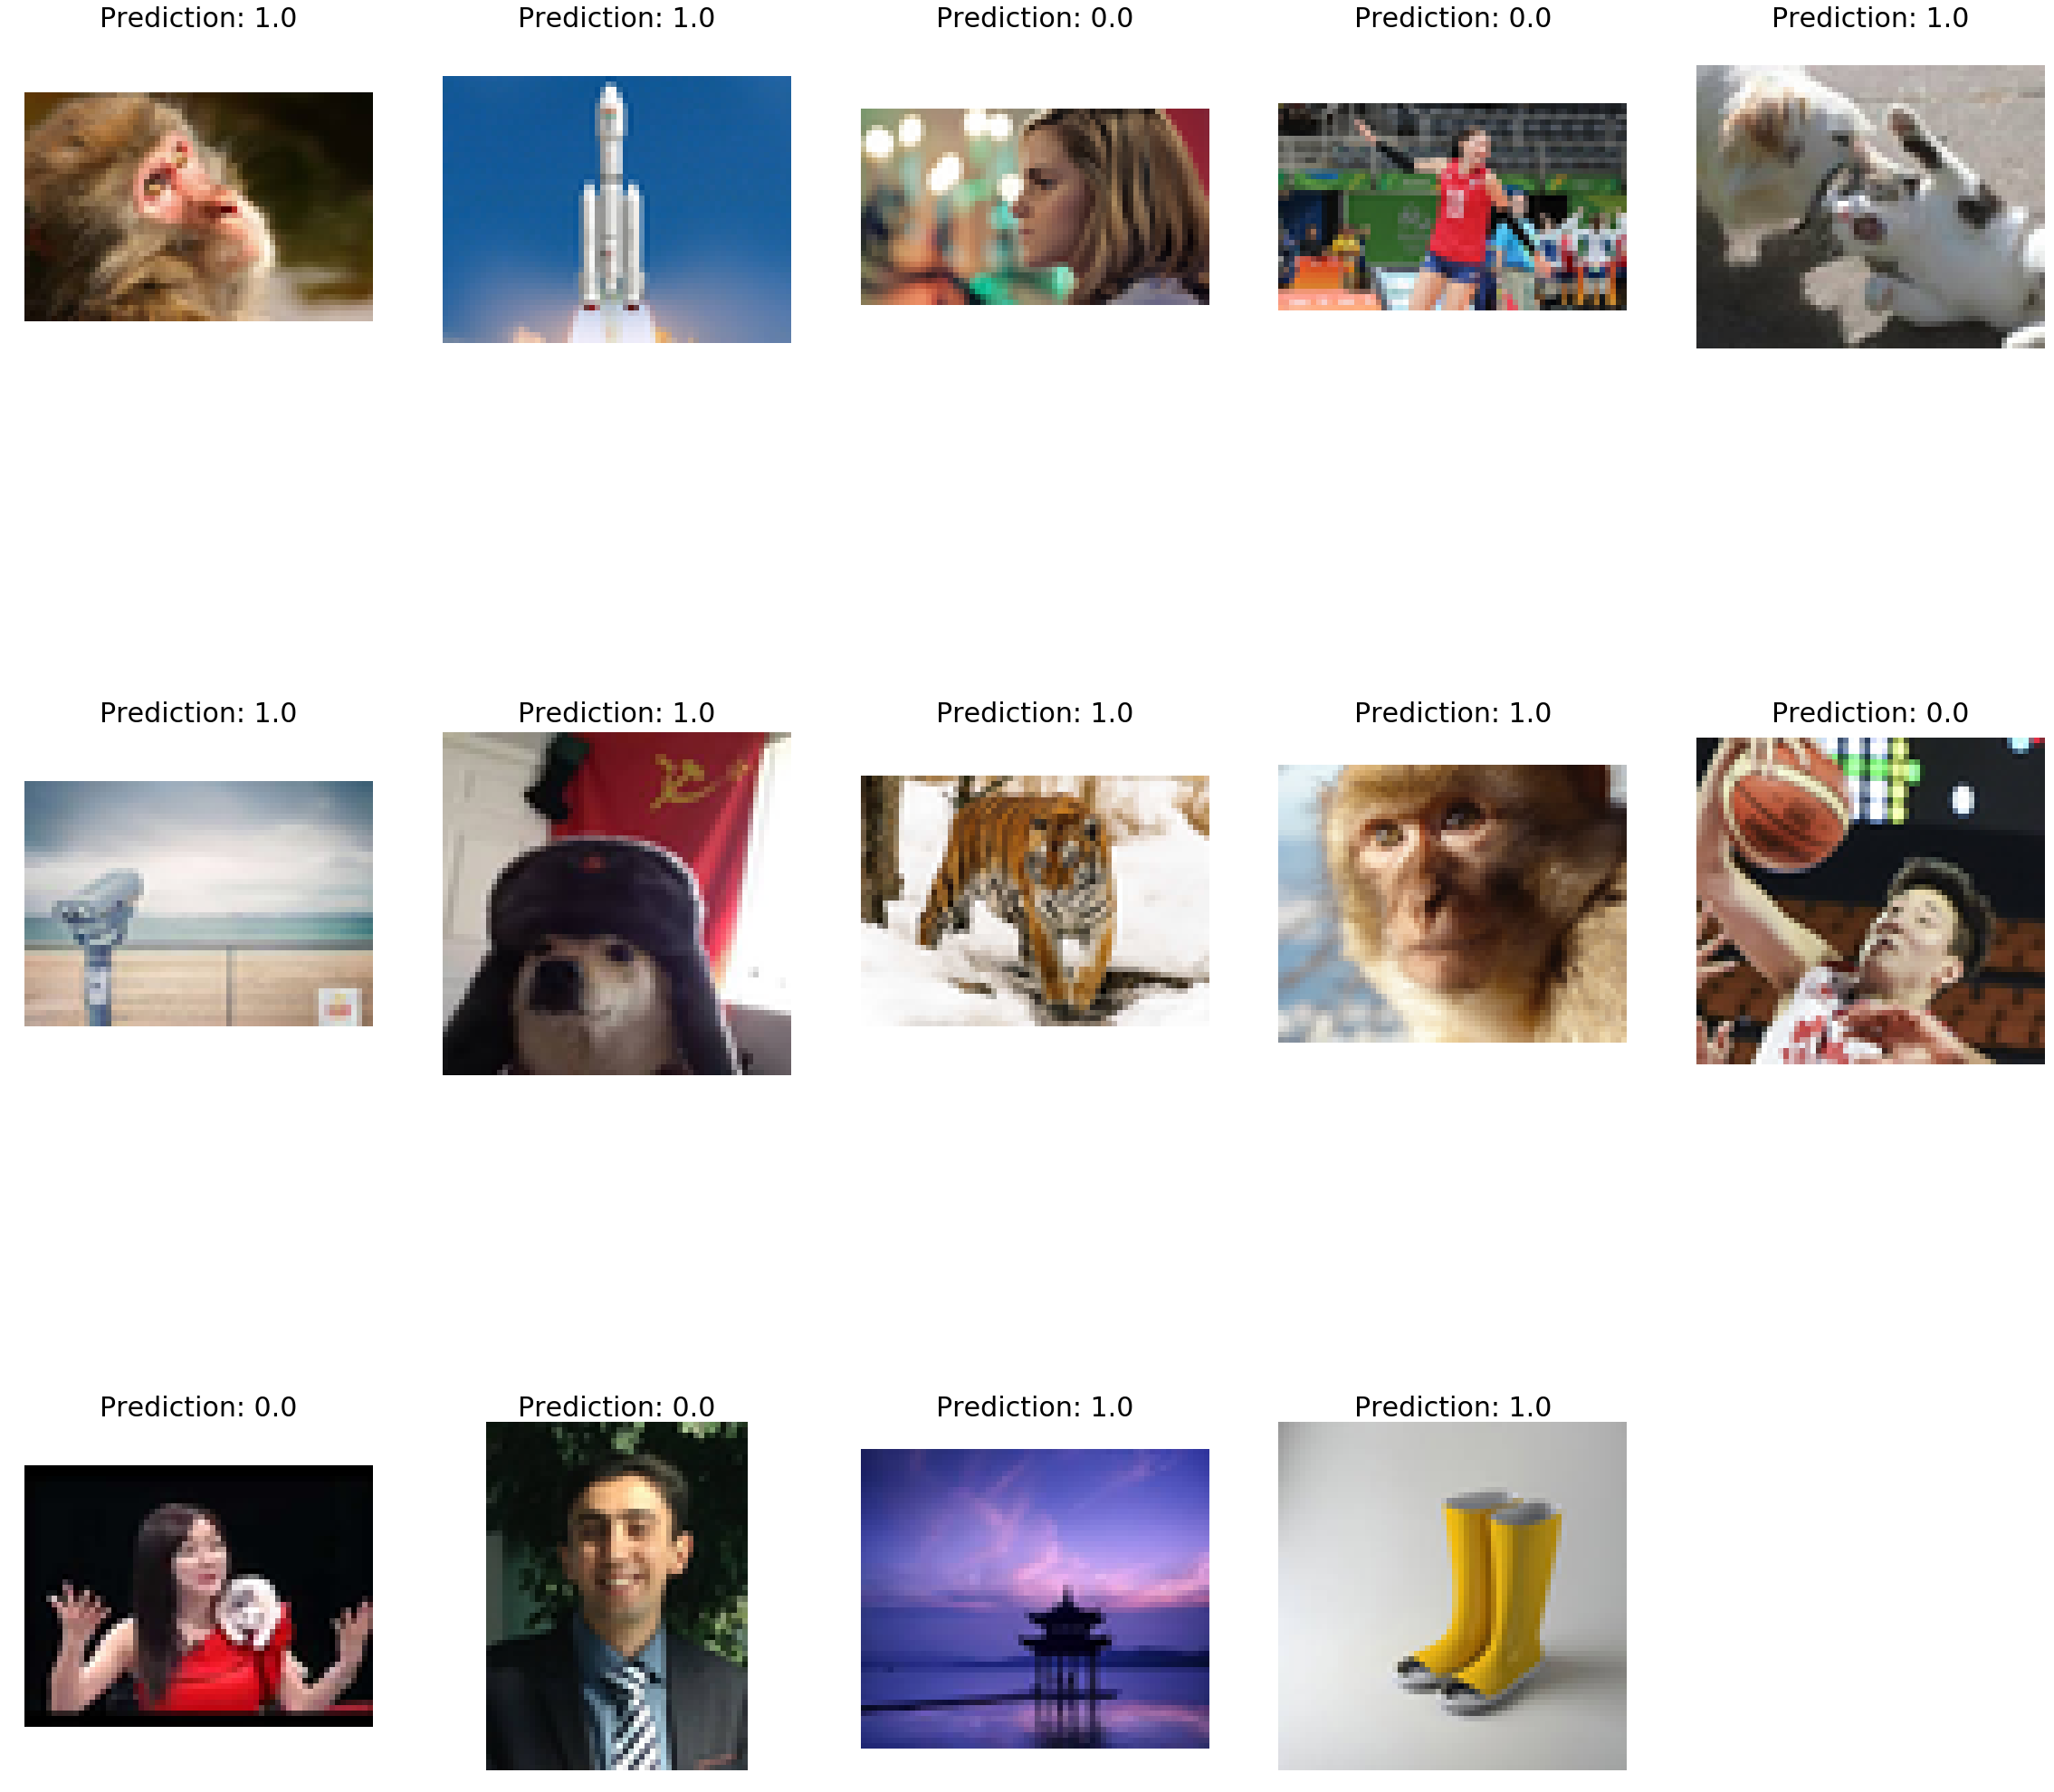

In [22]:
test_prediction = np.squeeze(result["result_test"]["prediction"])
result_test = result["result_test"]
misclasified = result_test["wrongImages"]
plt.rcParams['figure.figsize'] = (40, 40) # set default size of plots
num_img = len(misclasified)

print("Misclassified Images:", str(misclasified))
for i in range(0, num_img):
    index = misclasified[i]
    col = 5
    row = num_img//col + 1
#     print(index)
    
    plt.subplot(row, col, i + 1)
    img = Image.fromarray(test_x_raw[index], 'RGB')
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: " + str(test_prediction[index]), fontsize=30)

<h1>Try it!</h1>

/home/kkm/anaconda3/envs/tensorflowproject/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


사람얼굴입니다.


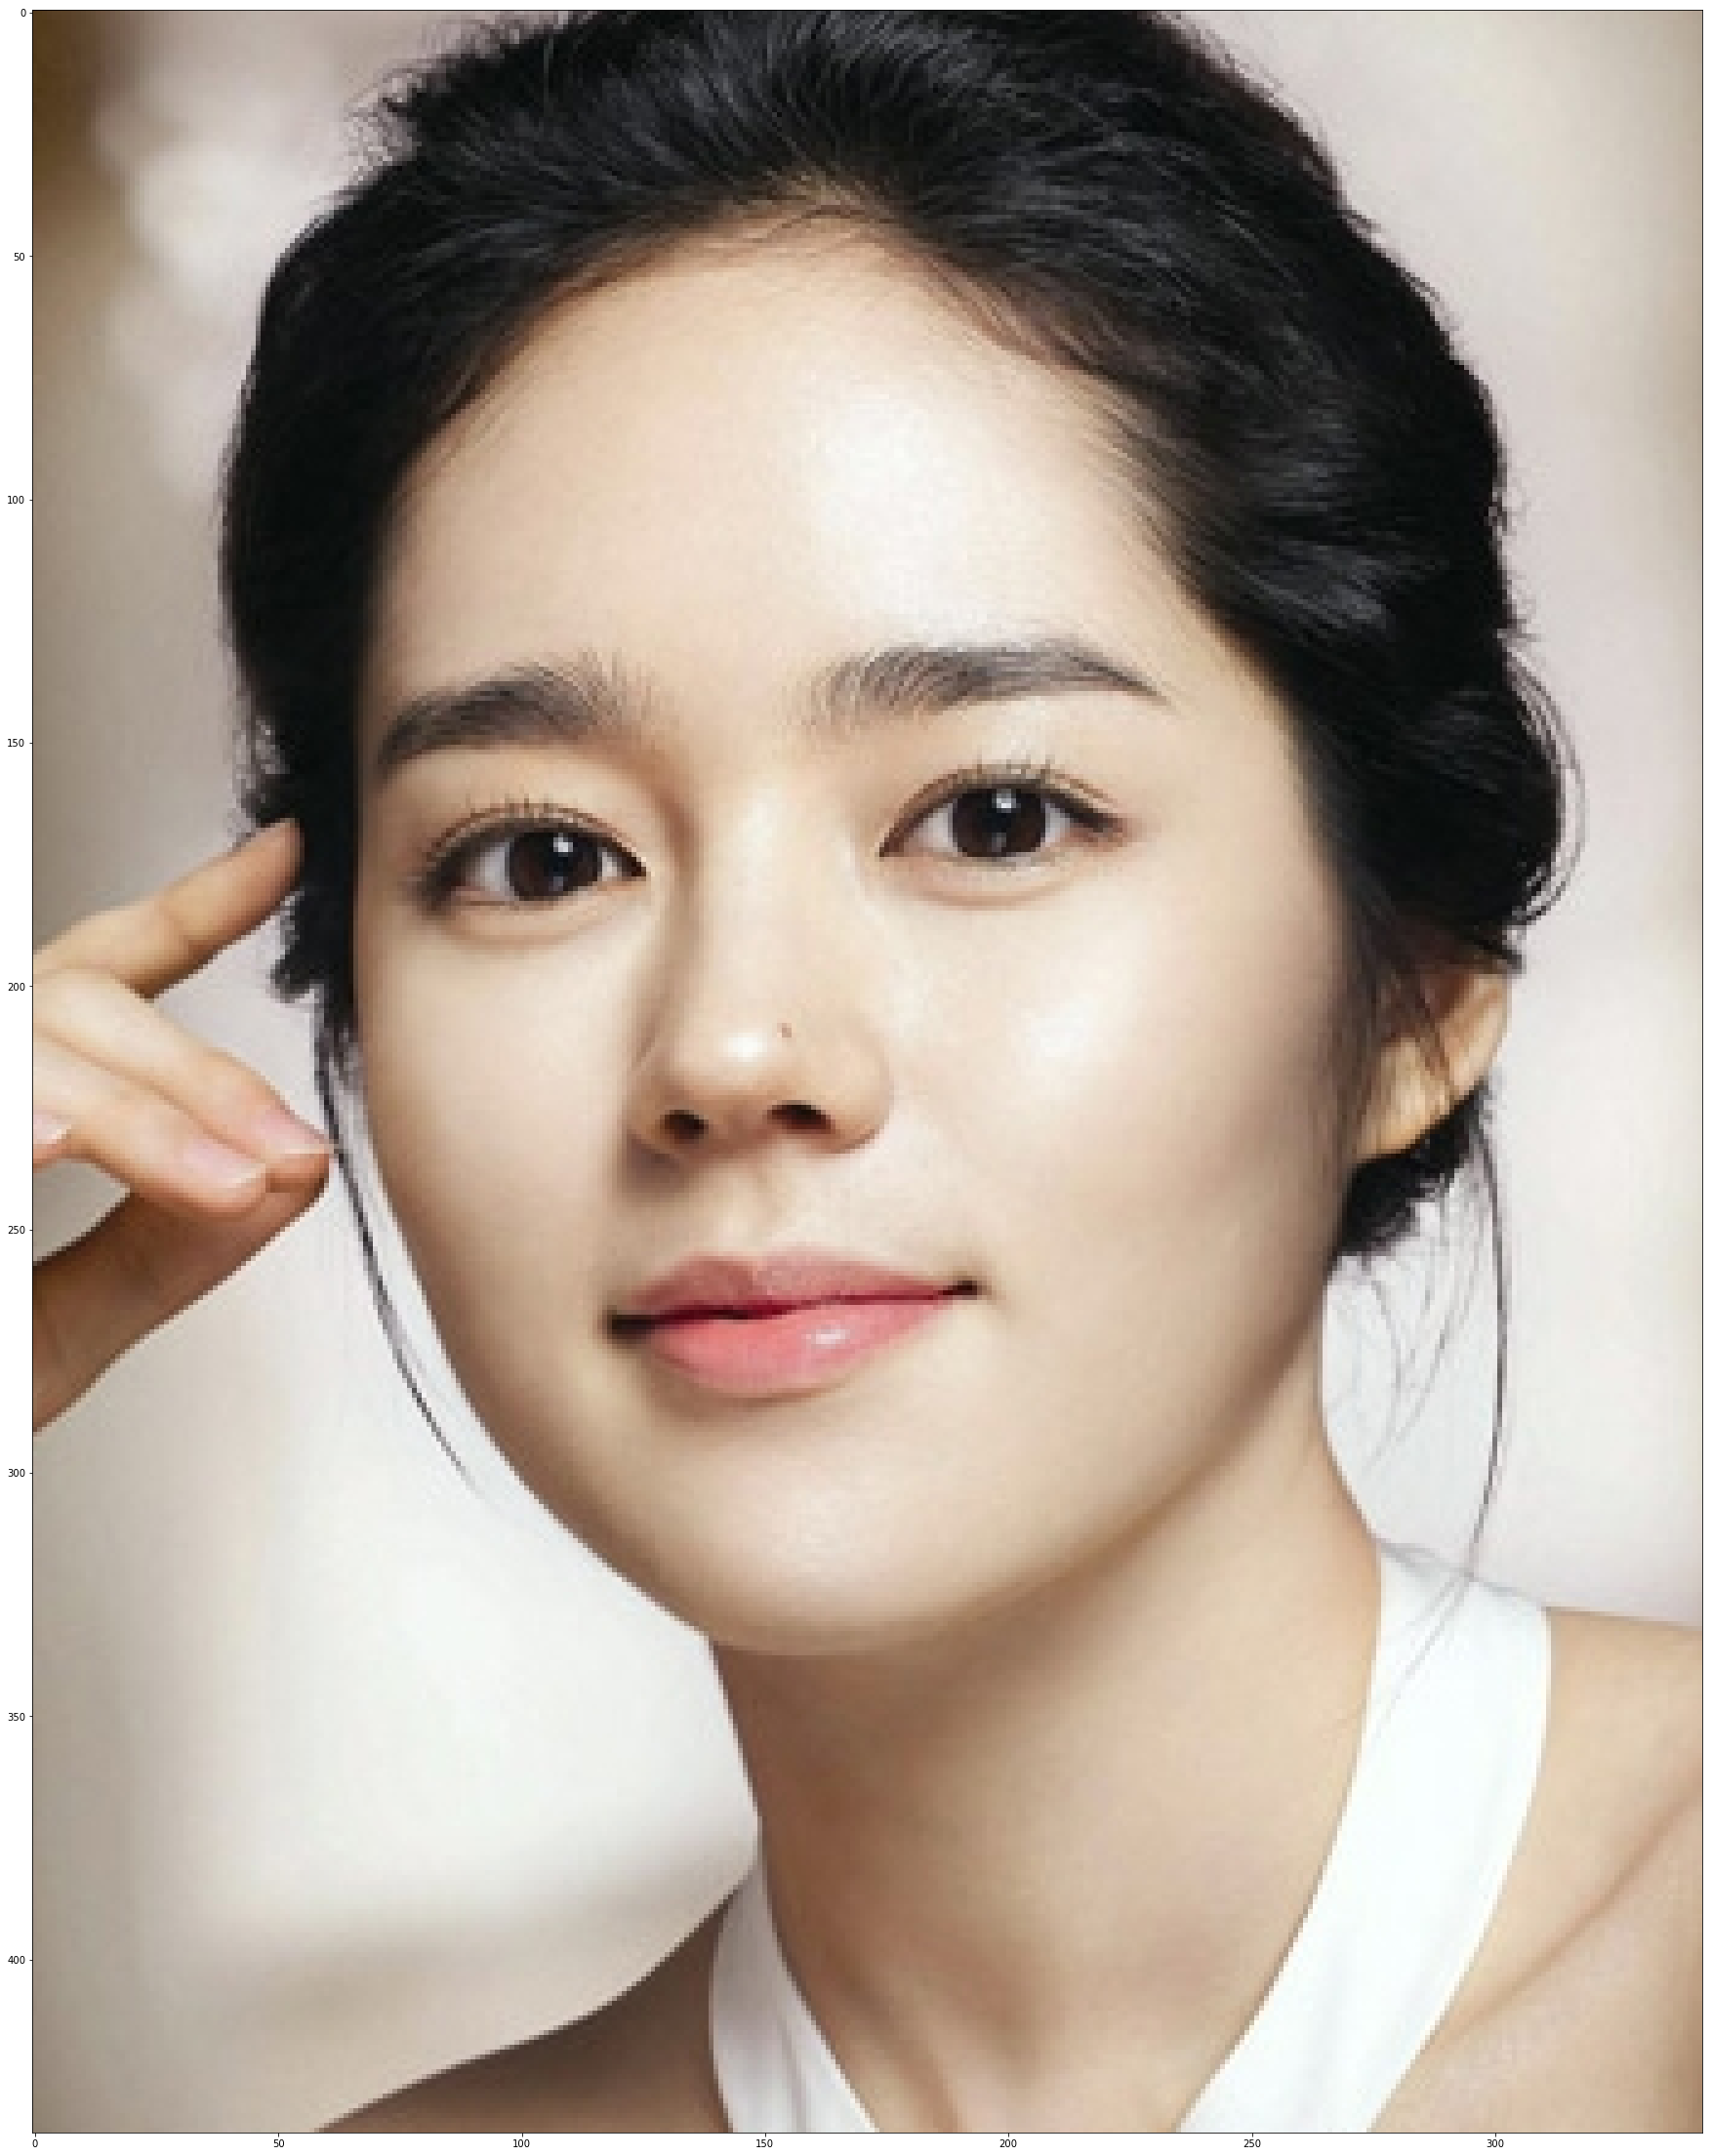

In [23]:
row_standard = 64
col_standard = 64

# 사람얼굴이 아닌 경우
# image_url = "images/my_image.jpg"
# mytest_y = np.array([[0]])

image_url = "images/my_image.png"
mytest_y = np.array([[1]])

im = Image.open(image_url)
oneImage = np.array(im)
plt.imshow(oneImage) # display original image

# 이미지 class prediction
im = scipy.misc.imresize(im, size=(row_standard,col_standard))
im = im[:,:,0:3]
im = im.reshape(1, im.shape[0]*im.shape[1]*im.shape[2]).T

prediction_result = helper.prediction(result["w"], result["b"], im, mytest_y)

if prediction_result["prediction"][0] > 0.5:
    print("사람얼굴입니다.")
else: 
    print("사람 얼굴이 아닙니다.")